# Agrupamiento por jerarquía

**Referencias**

* [A demo of structured Ward hierarchical clustering on an image of coins](https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_ward_segmentation.html)
* [Plot Hierarchical Clustering Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

In [3]:
#!pip install scikit-image

In [4]:
from skimage.data import coins
from sklearn.feature_extraction.image import grid_to_graph
import matplotlib.pyplot as plt

In [5]:
import time as time
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [6]:
from scipy.cluster.hierarchy import dendrogram

## Datos

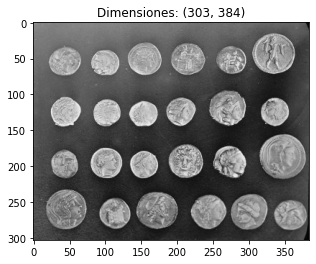

In [7]:
orig_coins = coins()  # imagen en escala de grises
plt.title("Dimensiones: " + str(orig_coins.shape))
axes_image = plt.imshow(orig_coins, cmap='gray')

## Matriz de conectividad

Para tomar en cuenta la posición del valor en la imagen se calcula una máscara, que coloca unos cuando los pixeles son adyacentes.

In [8]:
# Matriz de conectividad con representación rala
connectivity = grid_to_graph(*orig_coins.shape)
print("Dimensiones", connectivity.shape)
connectivity

Dimensiones (116352, 116352)


<116352x116352 sparse matrix of type '<class 'numpy.int64'>'
	with 580386 stored elements in COOrdinate format>

In [9]:
# Extraemos sólo una esquina para pasarla a representación densa
esquina = connectivity.tocsr()[0:50,0:50].toarray()

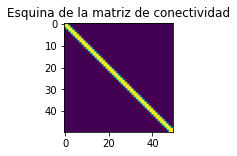

In [10]:
plt.figure(figsize=(2, 2))
plt.imshow(esquina)
plt.title("Esquina de la matriz de conectividad")
pass

## Agrupamiento aglomerativo

Del demo de
Vincent Michel, 2010 y Alexandre Gramfort, 2011

In [11]:
print("Compute structured hierarchical clustering...")
st = time.time()

# Preparación del algoritmo
n_clusters = 27  # number of regions
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward", connectivity=connectivity,
    compute_distances=True
)

# Dar formato requerido a los datos
X = np.reshape(orig_coins, (-1, 1))
# Entrenar
ward = ward.fit(X)

# Resultados
label = np.reshape(ward.labels_, orig_coins.shape)
print(f"Elapsed time: {time.time() - st:.3f}s")
print(f"Number of pixels: {label.size}")
print(f"Number of clusters: {np.unique(label).size}")

Compute structured hierarchical clustering...
Elapsed time: 9.644s
Number of pixels: 116352
Number of clusters: 27


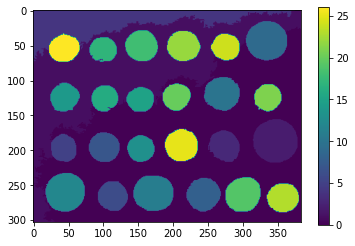

In [12]:
# Graficar grupos
plt.imshow(label)
plt.colorbar()

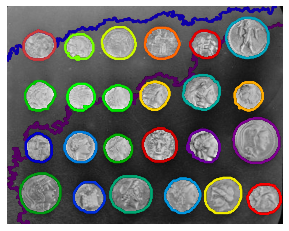

In [13]:
# Graficar contornos de grupos
plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(
        label == l,   # Pixeles con etiqueta l
        colors=[
            plt.cm.nipy_spectral(l / float(n_clusters)),
        ],
    )
plt.axis("off")
plt.show()

## Dendograma

In [11]:
# Fuente
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

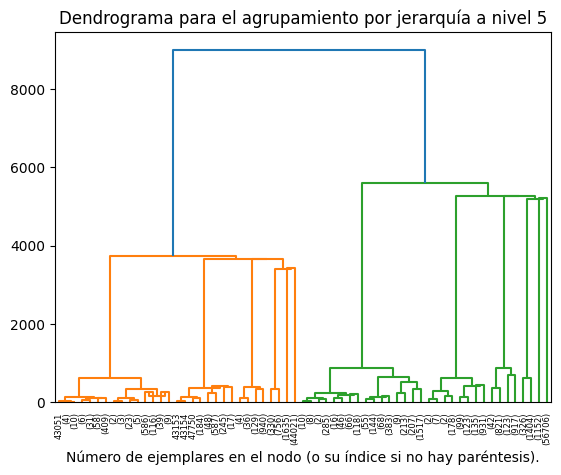

In [14]:
nivel = 5
plt.title(f"Dendrograma para el agrupamiento por jerarquía a nivel {nivel}")
# plot the top levels of the dendrogram
plot_dendrogram(ward, truncate_mode="level", p=nivel)
plt.xlabel("Número de ejemplares en el nodo (o su índice si no hay paréntesis).")
plt.show()